# Data from yFinance

 - About the yFinance Python Library

[yFinance library](#(#https://www.geeksforgeeks.org/machine-learning/what-is-yfinance-library/)) (Python) provides easy access to [Yahoo Finance](#https://finance.yahoo.com/) data. It is a key tool for investors and data analysts, offering a user-friendly way to download comprehensive market data directly in Python.

Key Features:

1. Historical Data: Download OHLC (Open, High, Low, Close) prices and volume data.

2. Financial Statements: Access balance sheets, income statements, and cash flow statements.

3. Corporate Actions: Get data on stock splits and dividends.

4. Company Metrics: Includes key data like earnings dates and EPS.

5. Multiple Tickers: Download data for several stocks at once for portfolio analysis.


 - What is the FAANG Stock

[FAANG](#https://www.investopedia.com/terms/f/faang-stocks.asp) is an acronym for five major American technology companies: Meta (formerly known as Facebook), Amazon, Apple, Netflix, and Alphabet (formarly known as Google).

These companies have a massive influence on the stock market and are part of major indices like the S&P 500. 


## Task 1: yFinance

Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

• Facebook (META)

• Apple (AAPL)

• Amazon (AMZN)

• Netflix (NFLX)

• Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two-digit day, and HHmmss is hour, minutes, seconds.

Create the data folder if you don't already have one.

Link for yfinance: https://github.com/ranaroussi/yfinance

### Importing all libraries

In [14]:
# Import Dates and Times
import datetime as dt

# Import yfinance and getting the data ready to run
import yfinance as yf

# Import Data Frames
import pandas as pd

# Import plotting library
import matplotlib.pyplot as plt

In [15]:
# Define FAANG Stock Tickers
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]


In [16]:
# Download data for the required stocks (FAANG)
df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h', auto_adjust=True)

[*********************100%***********************]  5 of 5 completed


In [17]:
# Display the first five rows of the Data Frame (df)
df.head()


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-03 14:30:00+00:00  287.340515  231.399994  317.915009  643.404175   
2025-12-03 15:30:00+00:00  286.410004  232.180695  319.535004  642.580017   
2025-12-03 16:30:00+00:00  286.385010  232.470001  320.679993  645.823303   
2025-12-03 17:30:00+00:00  285.679291  231.960007  321.505005  644.700012   
2025-12-03 18:30:00+00:00  285.209991  231.924896  320.859985  644.184998   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-03 14:30:00+00:00  102.864998  288.609985  233.380005  319.160004   
2025-12-03 15:30:00+00:00  103.504997  287.589996  233.190002  320.440491   
2025-12-03 16:30:00+00:00  103.800003  286.820007  232.789993  321.250000   
2025-12-03 17:30:00+00:00  103.565002  286.440002  232.634995  321.832001   
2025-12-03 18:30:00+00:00  103.399902  285.940002  232.425003  322.040009   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-12-03 14:30:00+00:00  648.849915  106.870003  ...  286.200012   
2025-12-03 15:30:00+00:00  644.839905  103.739998  ...  287.320007   
2025-12-03 16:30:00+00:00  645.830017  103.839996  ...  286.420013   
2025-12-03 17:30:00+00:00  645.919983  103.820000  ...  286.350006   
2025-12-03 18:30:00+00:00  645.299988  103.664497  ...  285.679993   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-12-03 14:30:00+00:00  233.350006  316.059998  644.409973  106.574997   
2025-12-03 15:30:00+00:00  231.380005  317.890015  643.275024  102.870003   
2025-12-03 16:30:00+00:00  232.210007  319.510010  642.549988  103.504997   
2025-12-03 17:30:00+00:00  232.470001  320.609985  645.770020  103.800003   
2025-12-03 18:30:00+00:00  231.979996  321.619995  644.614990  103.570000   

Price                       Volume                                       
Ticker                        AAPL     AMZN     GOOG     META      NFLX  
Datetime                                                                 
2025-12-03 14:30:00+00:00  6627228  7330773  3546038  1590547  11991978  
2025-12-03 15:30:00+00:00  3581593  3572833  2686121   944738   5459911  
2025-12-03 16:30:00+00:00  2126959  1757102  1901138   663862   2795629  
2025-12-03 17:30:00+00:00  2127386  1609332  1116778   408413   2449917  
2025-12-03 18:30:00+00:00  1618603  1532776  1158009   474190   2592187  

[5 rows x 25 columns]

In [18]:
# Save the data frame to CSV
now= dt.datetime.now()

# Source: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

# Create the filename (and add formatting date and time) 
filename = 'data/' + now.strftime('%Y%m%d_%H%M%S') + ".csv"

# Save data to CSV File
df.to_csv(filename)


# Problem 2: Plotting FAANG Closing Prices

#### A picture is worth a thousand words...

Task 2: Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

In [19]:
# Import matplotlib for plotting the data
import matplotlib.pyplot as plt

In [20]:
# List Columns of df
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [21]:
# Display Close prices only
df['Close']

Ticker,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,
2025-12-03 14:30:00+00:00,287.340515,231.399994,317.915009,643.404175,102.864998
2025-12-03 15:30:00+00:00,286.410004,232.180695,319.535004,642.580017,103.504997
2025-12-03 16:30:00+00:00,286.385010,232.470001,320.679993,645.823303,103.800003
2025-12-03 17:30:00+00:00,285.679291,231.960007,321.505005,644.700012,103.565002
2025-12-03 18:30:00+00:00,285.209991,231.924896,320.859985,644.184998,103.399902
2025-12-03 19:30:00+00:00,284.554993,232.610001,321.779999,644.118103,104.184998
2025-12-03 20:30:00+00:00,284.149994,232.369995,320.540009,639.739990,103.970001
2025-12-04 14:30:00+00:00,281.225006,228.774994,317.510010,665.729980,102.540001
2025-12-04 15:30:00+00:00,280.279999,227.899994,316.809998,664.849976,102.120003


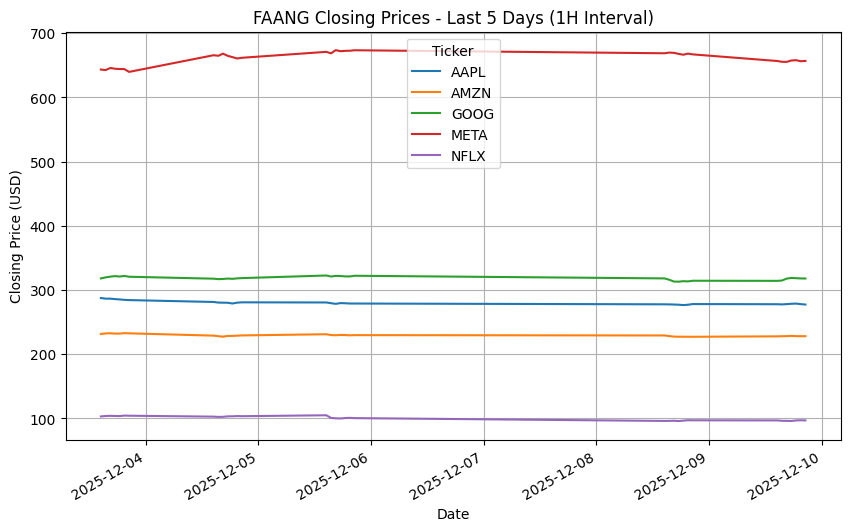

In [22]:
# Saving the plot automatically under "plots" folder

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot FAANG closing prices
df['Close'].plot(ax=ax)

# Set title and labels
ax.set_title('FAANG Closing Prices - Last 5 Days (1H Interval)')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price (USD)')
# Show grid
ax.grid(True)

# Filename with today's date
filename = 'plots/FAANG_closing_prices_' + now.strftime("%Y%m%d") + '.png'


# Save figure as an image file as today's date
fig.savefig(filename, dpi=300)

## File Listings

In [23]:
import os


In [24]:
# Listing files in the data folder
data_files =os.listdir('data/')

# Show the list of files
data_files

['data.csv',
 '20251209_210930.csv',
 '20251116-202630.csv',
 '20251111-221541.csv',
 '20251111-211253.csv',
 '20251202_180124.csv',
 '20251104-203845.csv',
 '20251104-205416.csv',
 '20251202_181553.csv',
 '20251202_223004.csv',
 '20251209_214049.csv',
 '20251104-203513.csv',
 '20251203_232248.csv',
 '20251116-204021.csv',
 '20251104-203516.csv',
 '20251209_214153.csv',
 '20251104-203633.csv',
 '20251104-202639.csv',
 '20251202_184952.csv']

In [25]:
# Sort the data files
data_files.sort(reverse=True)

# Display the most recent file
data_files[0]

'data.csv'

In [26]:
# Listing files in a folder
os.listdir('plots/')

['FAANG_closing_prices_20251202.png',
 'FAANG_closing_prices_20251119.png',
 'FAANG_closing_prices_20251203.png',
 'FAANG_closing_prices_20251209.png']

Problem 3: Script
Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot.

Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

Problem 4: Automation
Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

## End
